# Revisiting the risk

[The risk we saw last time has two components - systematic risk and unsystematic risk.](https://www.nseindia.com/products-services/indices-beta)


### Systematic risks:
These are risks associated with the economic, political, sociological and other macro-level changes. They affect the entire market as a whole and cannot be controlled or eliminated merely by diversifying one's portfolio.

### Unsystematic risks:
These are risks that are unique to a firm or industry. Factors such as management capability, consumer preferences, labour, etc. contribute to unsystematic risks. Unsystematic risks are controllable by nature and can be considerably reduced by sufficiently diversifying one's portfolio.

Because portfolio has different stocks, not all stocks will have unsystematic risks at same time, ie frauds dont happen in all companies at once, One stock fall should not affect the rest of the portfolio.

However, Systematic risk is such that it affects all the stocks at the same time ie, when covid happened or 2008 happened all stocks fell. so the question is- In case of systematic risk, so some stocks are less succeptible to systematic risk than others, in general higher risk also results in higher returns, but it also results in higher fall than overall market in crash scenario


# What is Beta?

The degree to which different portfolios are affected by these systematic risks as compared to the effect on the market as a whole, is different and is measured by Beta. To put it differently, the systematic risks of various securities differ due to their relationships with the market. The Beta factor describes the movement in a stock's or a portfolio's returns in relation to that of the market returns. For all practical purposes, the market returns are measured by the returns on the index (Nifty, Mid-cap etc.), since the index is a good reflector of the market.


$$ \beta = \frac {cov(stock, index)} {\sigma_{index}^2} $$

In case of India, index is NIFTY 50 or Sensex

**Note that this is not correlation, it is covariance. Hence the range of beta is different**

## How to interprete beta

Beta measures risk in the form of volatility **against a benchmark** and is based on the principle that higher risk come with higher potential rewards. Analysts use beta when they want to determine a stock's risk profile. 

**High-beta stocks**, which generally means any stock with a **beta higher than 1.0**, are supposed to be **riskier** but provide **higher return potential**; low-beta stocks, those with a beta under 1.0, pose less risk but also usually lower returns

Note: Run below if running in Google Colab
```
wget https://swapniljariwala.github.io/ind_nifty50list.csv
```

In [4]:
import yfinance as yf
import pickle
import pandas as pd
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning) # Not optimizing for performance
simplefilter(action="ignore", category=FutureWarning) # Not concerned about future compatibility
N=1

/Users/swapniljariwala/pyapps/fp-knowledge-cafe/env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Let's get data for all nifty 50 stocks

In [5]:
with open('ind_nifty50list.csv') as fp:
    text = fp.read()
    rows = text.split('\n')
    stocks = [row.split(',')[2] + '.NS' for row in rows if len(row) > 0]
    stocks.append("^NSEI") # NIFTY
try:
    # Try loading from disk and if it fails then download from internet and save to disk
    with open(f'nifty50-with-index-{N}y.pkl', 'rb') as fp:
        hist = pickle.load(fp)
        print("Loaded data from disk")
except:    
    stocks_str = ' '.join(stocks[1:])
    hist = yf.download(stocks_str, period=f"{N}y")
    print("Downloaded data")
    hist.to_pickle(f'nifty50-with-index-{N}y.pkl.pkl')
    print("Saved to disk")

[*********************100%***********************]  51 of 51 completed
Downloaded data
Saved to disk


Columns are Hierarchically indexed

In [6]:
hist.head()

Adj Close                                                        \
            ADANIENT.NS ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                                            
2023-02-28  1363.168945    588.493774   4389.593262   2805.189697  843.239502   
2023-03-01  1563.518921    598.079285   4401.709961   2817.188721  864.268066   
2023-03-02  1606.447388    618.740417   4390.142090   2810.247070  844.588135   
2023-03-03  1878.561401    680.078064   4396.225098   2805.239502  851.780823   
2023-03-06  1981.909790    686.137329   4408.990234   2840.641602  858.623840   

                                                                    \
           BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   
Date                                                                 
2023-02-28   3447.065674   1333.494141   6060.486328    738.856079   
2023-03-01   3513.395264   1342.484619   6102.875488    746.769775   
2023-03-02   3497.954346   1342.135132   6031.632324    736.715881   
2023-03-03   3513.724854   1353.922607   6048.538086    760.904846   
2023-03-06   3505.298340   1379.345825   6083.043945    763.094727   

                        ...        Volume                                      \
               BPCL.NS  ... TATACONSUM.NS TATAMOTORS.NS TATASTEEL.NS   TCS.NS   
Date                    ...                                                     
2023-02-28  299.691040  ...       2395442       9652088     76540448  4116217   
2023-03-01  298.321716  ...        991540       7595114     76175319  1669307   
2023-03-02  303.185150  ...        969963       5661103     55276248  1556538   
2023-03-03  303.515656  ...        873264       8027522    117175295  1043190   
2023-03-06  306.490387  ...        739338      11307064    106868143  1334132   

                                                                      
           TECHM.NS TITAN.NS ULTRACEMCO.NS   UPL.NS WIPRO.NS   ^NSEI  
Date                                                                  
2023-02-28  3894204  1430349        429256  2676043  5030801  420900  
2023-03-01  2084324   479935        317216  1835234  2271306  272900  
2023-03-02  1838692   529609        180178   993892  2219486  310700  
2023-03-03  2388401   710845        408754  1154106  2196968  356200  
2023-03-06  2076844   682556        154817  1066876  3363861  362800  

[5 rows x 306 columns]

In [7]:
hist['Close']

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-28,1363.849976,592.450012,4401.649902,2828.800049,844.099976,3661.199951,1334.900024,6112.100098,742.250000,317.350006,...,715.299988,420.700012,103.949997,3312.850098,1100.250000,2372.800049,7261.299805,694.200012,387.049988,17303.949219
2023-03-01,1564.300049,602.099976,4413.799805,2840.899902,865.150024,3731.649902,1343.900024,6154.850098,750.200012,315.899994,...,715.250000,426.000000,105.500000,3385.699951,1126.900024,2382.399902,7274.149902,713.299988,390.950012,17450.900391
2023-03-02,1607.250000,622.900024,4402.200195,2833.899902,845.450012,3715.250000,1343.550049,6083.000000,740.099976,321.049988,...,707.349976,420.450012,104.650002,3321.449951,1109.800049,2358.949951,7289.200195,705.900024,388.049988,17321.900391
2023-03-03,1879.500000,684.650024,4408.299805,2828.850098,852.650024,3732.000000,1355.349976,6100.049805,764.400024,321.399994,...,709.849976,428.000000,107.000000,3342.149902,1085.150024,2396.100098,7215.950195,710.000000,390.450012,17594.349609
2023-03-06,1982.900024,690.750000,4421.100098,2864.550049,859.500000,3723.050049,1380.800049,6134.850098,766.599976,324.549988,...,713.599976,440.100006,105.650002,3371.850098,1090.050049,2403.449951,7200.600098,711.049988,393.750000,17711.449219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,3263.050049,1310.949951,6769.200195,3017.399902,1100.900024,8498.450195,1592.550049,6674.950195,1135.550049,625.900024,...,1159.500000,932.299988,145.899994,4087.100098,1328.099976,3652.050049,9961.200195,492.299988,531.049988,22217.449219
2024-02-23,3273.300049,1320.699951,6774.049805,2985.949951,1096.800049,8436.950195,1616.550049,6697.850098,1125.750000,617.950012,...,1160.300049,937.400024,145.449997,4052.100098,1322.250000,3691.949951,10000.900391,488.700012,536.150024,22212.699219
2024-02-26,3327.750000,1338.150024,6584.000000,2868.449951,1085.199951,8448.000000,1614.300049,6643.250000,1110.050049,627.150024,...,1177.099976,936.950012,142.649994,4001.050049,1298.250000,3622.500000,9930.049805,489.149994,532.900024,22122.050781


Calculate the returns

In [8]:
for stock in stocks[1:]:
    hist[('Prev. Close', stock)] = hist[('Close', stock)].shift(1)


In [9]:

for stock in stocks[1:]:
    hist[('Return', stock)] = hist[('Close', stock)] / hist[('Prev. Close', stock)] - 1
hist = hist.dropna()

Calculate covariance

In [10]:
cov = hist['Return'].cov()

In [11]:
cov.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,UPL.NS,ULTRACEMCO.NS,WIPRO.NS,^NSEI
ADANIENT.NS,0.001013,0.000533,0.000056,0.000066,0.000050,0.000061,0.000067,0.000080,0.000117,0.000045,...,0.000065,0.000033,0.000124,0.000105,0.000062,0.000047,0.000100,0.000057,0.000066,0.000080
ADANIPORTS.NS,0.000533,0.000471,0.000038,0.000042,0.000037,0.000050,0.000058,0.000058,0.000103,0.000025,...,0.000040,0.000038,0.000093,0.000082,0.000033,0.000058,0.000067,0.000052,0.000052,0.000058
APOLLOHOSP.NS,0.000056,0.000038,0.000182,0.000036,0.000021,0.000027,0.000034,0.000020,0.000030,0.000029,...,0.000008,0.000021,0.000036,0.000035,0.000047,0.000033,0.000047,0.000036,0.000033,0.000026
ASIANPAINT.NS,0.000066,0.000042,0.000036,0.000113,0.000021,0.000012,0.000043,0.000030,0.000034,0.000001,...,0.000029,0.000032,0.000018,0.000021,0.000026,0.000035,0.000039,0.000022,0.000030,0.000025
AXISBANK.NS,0.000050,0.000037,0.000021,0.000021,0.000155,0.000030,0.000044,0.000040,0.000008,0.000016,...,0.000008,0.000023,0.000038,0.000038,0.000011,0.000020,0.000042,0.000035,0.000021,0.000037


We are only interested in covariance of stocks with NIFTY

In [12]:
cov_nifty = cov['^NSEI']

In [13]:
stock_var = hist['Return'].var()
var_index = stock_var['^NSEI']
var_index

4.047094635216909e-05

In [14]:
beta_matrix = cov_nifty/var_index

In [15]:
beta_matrix.sort_values(ascending=False).head()

ADANIENT.NS      1.979632
ADANIPORTS.NS    1.439763
RELIANCE.NS      1.269397
HDFCBANK.NS      1.260193
WIPRO.NS         1.255999
Name: ^NSEI, dtype: float64

In [16]:
beta_matrix.sort_values().head()

CIPLA.NS        0.140021
SUNPHARMA.NS    0.392090
DRREDDY.NS      0.513518
NESTLEIND.NS    0.516811
BRITANNIA.NS    0.538281
Name: ^NSEI, dtype: float64

<Axes: xlabel='Date'>

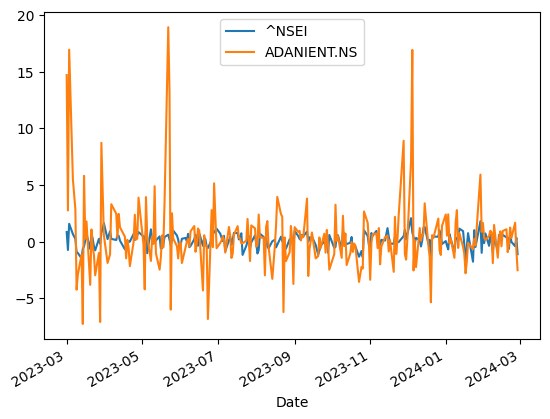

In [17]:
(hist['Return']*100)[['^NSEI', 'ADANIENT.NS']].plot()

<Axes: xlabel='Date'>

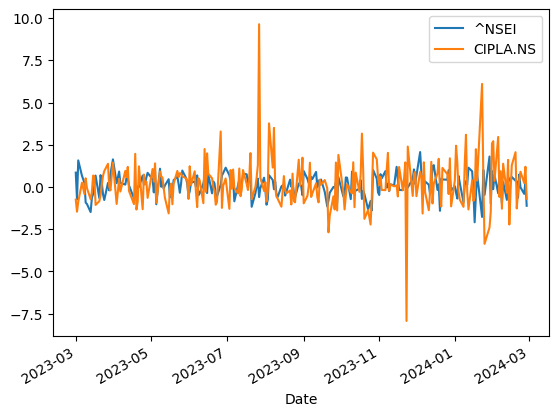

In [18]:
(hist['Return']*100)[['^NSEI', 'CIPLA.NS']].plot()

Is this all theory, or someone is using it?

[1. Moneycontrol](https://www.moneycontrol.com/mutual-funds/nav/hdfc-small-cap-fund-growth/MMS002)
<div>
<img src="https://swapniljariwala.github.io/moneycontrol-risk-ratios.png" width="500"/>
</div>

[2. Smallcase smart beta](https://www.smallcase.com/blog/quality-smart-beta/)